In [69]:
import pandas as pd
import numpy as np

### Выполним подготовку данных для анализа

In [2]:
gold_prices_df = pd.read_csv('gold_prices_quarterly.csv', delimiter=',')
debt_df = pd.read_csv('debt_quarterly.csv', delimiter=',')
gdp_df = pd.read_csv('gdp_quarterly.csv')
brent_df = pd.read_csv('brent_quarterly.csv', delimiter=',')

In [3]:
from datetime import datetime

In [4]:
gold_prices_df

Date  Price_gold
0   1993-04-01       336.4
1   1993-07-01       379.0
2   1993-10-01       354.0
3   1994-04-01       389.2
4   1994-07-01       384.6
5   1996-01-01       387.0
6   1996-04-01       394.2
7   1996-07-01       381.6
8   1996-10-01       378.7
9   1997-01-01       369.3
10  1997-04-01       350.0
11  1997-07-01       333.7
12  1997-10-01       337.2
13  1998-01-01       290.2
14  1998-04-01       301.0
15  1998-07-01       296.8
16  1998-10-01       297.6
17  1999-01-01       287.8
18  1999-04-01       280.6
19  1999-07-01       262.6
20  1999-10-01       307.5
21  2001-01-01       274.5
22  2001-10-01       290.6
23  2002-01-01       276.5
24  2002-04-01       301.4
25  2002-07-01       312.1
26  2002-10-01       321.8
27  2003-01-01       347.2
28  2003-04-01       334.4
29  2003-07-01       350.2
30  2003-10-01       383.5
31  2004-01-01       416.3
32  2004-04-01       427.3
33  2004-07-01       394.8
34  2004-10-01       418.1
35  2005-04-01       427.2
36  2005-07-01       432.6
37  2007-01-01       632.0
38  2007-10-01       742.5
39  2008-01-01       833.8
40  2008-04-01       887.8
41  2008-07-01       937.5
42  2008-10-01       880.0
43  2009-01-01       869.8
44  2009-04-01       924.5
45  2009-07-01       938.3
46  2009-10-01      1004.8
47  2010-01-01      1087.5
48  2010-04-01      1123.5
49  2010-07-01      1234.0
50  2010-10-01      1316.3
51  2011-04-01      1418.0
52  2011-07-01      1483.0
53  2012-10-01      1787.0

In [5]:
# Функция для преобразования строки в дату
def convert_date(date_string):
    if isinstance(date_string, str): 
        formats = ['%m/%d/%Y', '%Y-%m-%d', '%m %Y']
        for fmt in formats:
            try:
                return datetime.strptime(date_string, fmt)
            except ValueError:
                continue
    return None 


debt_df['Date'] = debt_df['Date'].apply(convert_date)


In [7]:
# Удаление запятых из столбца 'Debt' и преобразование в числа
debt_df['Debt'] = debt_df['Debt'].replace(',', '').astype(float)

In [8]:
dataframes = [gold_prices_df, debt_df, gdp_df, brent_df]
for df in dataframes:
    df['Date'] = pd.to_datetime(df['Date'])

# Нахождение минимальной и максимальной даты, которые содержатся во всех датафреймах
min_date = max(df['Date'].min() for df in dataframes)
max_date = min(df['Date'].max() for df in dataframes)

print(f"Минимальная дата: {min_date}")
print(f"Максимальная дата: {max_date}")

# Выбор только тех дат, которые будут записаны по кварталам
quarterly_dates = pd.date_range(start=min_date, end=max_date, freq='QS')

gold_prices_df_q = gold_prices_df[gold_prices_df['Date'].isin(quarterly_dates)]
debt_df_q = debt_df[debt_df['Date'].isin(quarterly_dates)]
brent_df_q = brent_df[brent_df['Date'].isin(quarterly_dates)]
gdp_df_q = gdp_df[gdp_df['Date'].isin(quarterly_dates)]

Минимальная дата: 1993-04-01 00:00:00
Максимальная дата: 2012-10-01 00:00:00


In [10]:
gold_prices_df_q['Price_gold'] = gold_prices_df_q['Price_gold'].replace(' ', '').astype(float)

In [11]:
gold_prices_df_q.to_csv('gold_prices_quarterly.csv', index=False)
debt_df_q.to_csv('debt_quarterly.csv', index=False)
gdp_df_q.to_csv('gdp_quarterly.csv', index=False)
brent_df_q.to_csv('brent_quarterly.csv', index=False)

Предварительная обработка данных завершена, теперь можно приступать к их анализу

### Описание данных

In [171]:
gold_prices_df = pd.read_csv('gold_prices_quarterly.csv')
debt_df = pd.read_csv('debt_quarterly.csv')
gdp_df = pd.read_csv('gdp_quarterly.csv')
brent_df = pd.read_csv('brent_quarterly.csv')

In [172]:
# Добавление столбца 'lag' в каждый датафрейм
gold_prices_df['lag'] = range(1, len(gold_prices_df) + 1)
debt_df['lag'] = range(1, len(debt_df) + 1)
gdp_df['lag'] = range(1, len(gdp_df) + 1)
brent_df['lag'] = range(1, len(brent_df) + 1)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

Построим графики времянных рядов

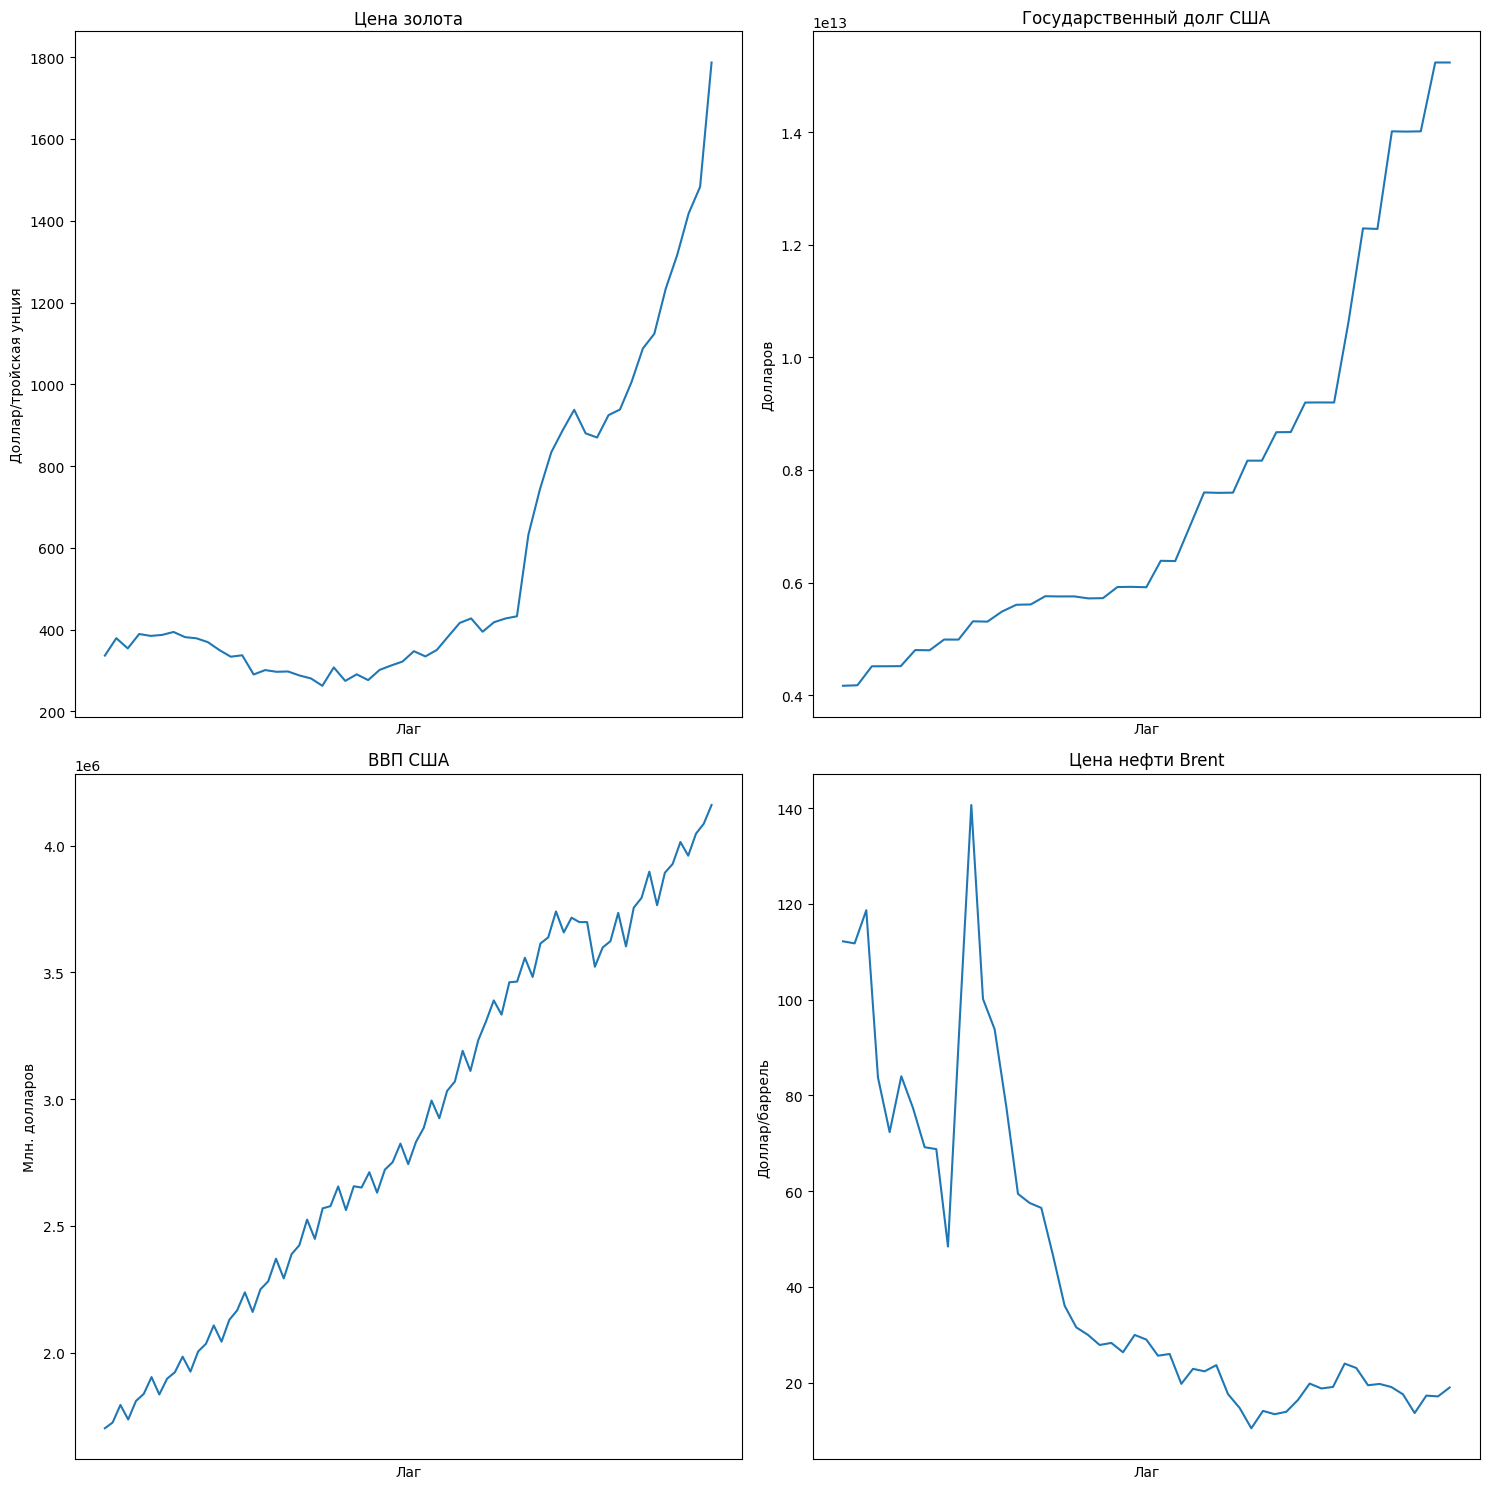

In [165]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Построение графиков
axs[0, 0].plot(gold_prices_df['Date'], gold_prices_df['Price_gold'])
axs[0, 0].set_xticks([])
axs[0, 0].set_xlabel('Лаг')
axs[0, 0].set_ylabel('Доллар/тройская унция')
axs[0, 0].set_title('Цена золота')

axs[0, 1].plot(debt_df['Date'], debt_df['Debt'])
axs[0, 1].set_xticks([])
axs[0, 1].set_xlabel('Лаг')
axs[0, 1].set_ylabel('Долларов')
axs[0, 1].set_title('Государственный долг США')

axs[1, 0].plot(gdp_df['Date'], gdp_df['Gdp'])
axs[1, 0].set_xticks([])
axs[1, 0].set_xlabel('Лаг')
axs[1, 0].set_ylabel('Млн. долларов')
axs[1, 0].set_title('ВВП США')

axs[1, 1].plot(brent_df['Date'], brent_df['Price_brent'])
axs[1, 1].set_xticks([])
axs[1, 1].set_xlabel('Лаг')
axs[1, 1].set_ylabel('Доллар/баррель')
axs[1, 1].set_title('Цена нефти Brent')

plt.tight_layout()
plt.show()


Вычислим темпы роста и прироста для каждого времянного ряда

In [76]:
# Расчет темпа роста и темпа прироста для каждого ВР
gold_prices_df['Growth_Rate'] = gold_prices_df['Price_gold'].pct_change()
gold_prices_df['Growth_Amount'] = gold_prices_df['Price_gold'].diff()

debt_df['Growth_Rate'] = debt_df['Debt'].pct_change()
debt_df['Growth_Amount'] = debt_df['Debt'].diff()

gdp_df['Growth_Rate'] = gdp_df['Gdp'].pct_change()
gdp_df['Growth_Amount'] = gdp_df['Gdp'].diff()

brent_df['Growth_Rate'] = brent_df['Price_brent'].pct_change()
brent_df['Growth_Amount'] = brent_df['Price_brent'].diff()


Построим графики темпа роста и темпа прироста для каждого времянного ряда

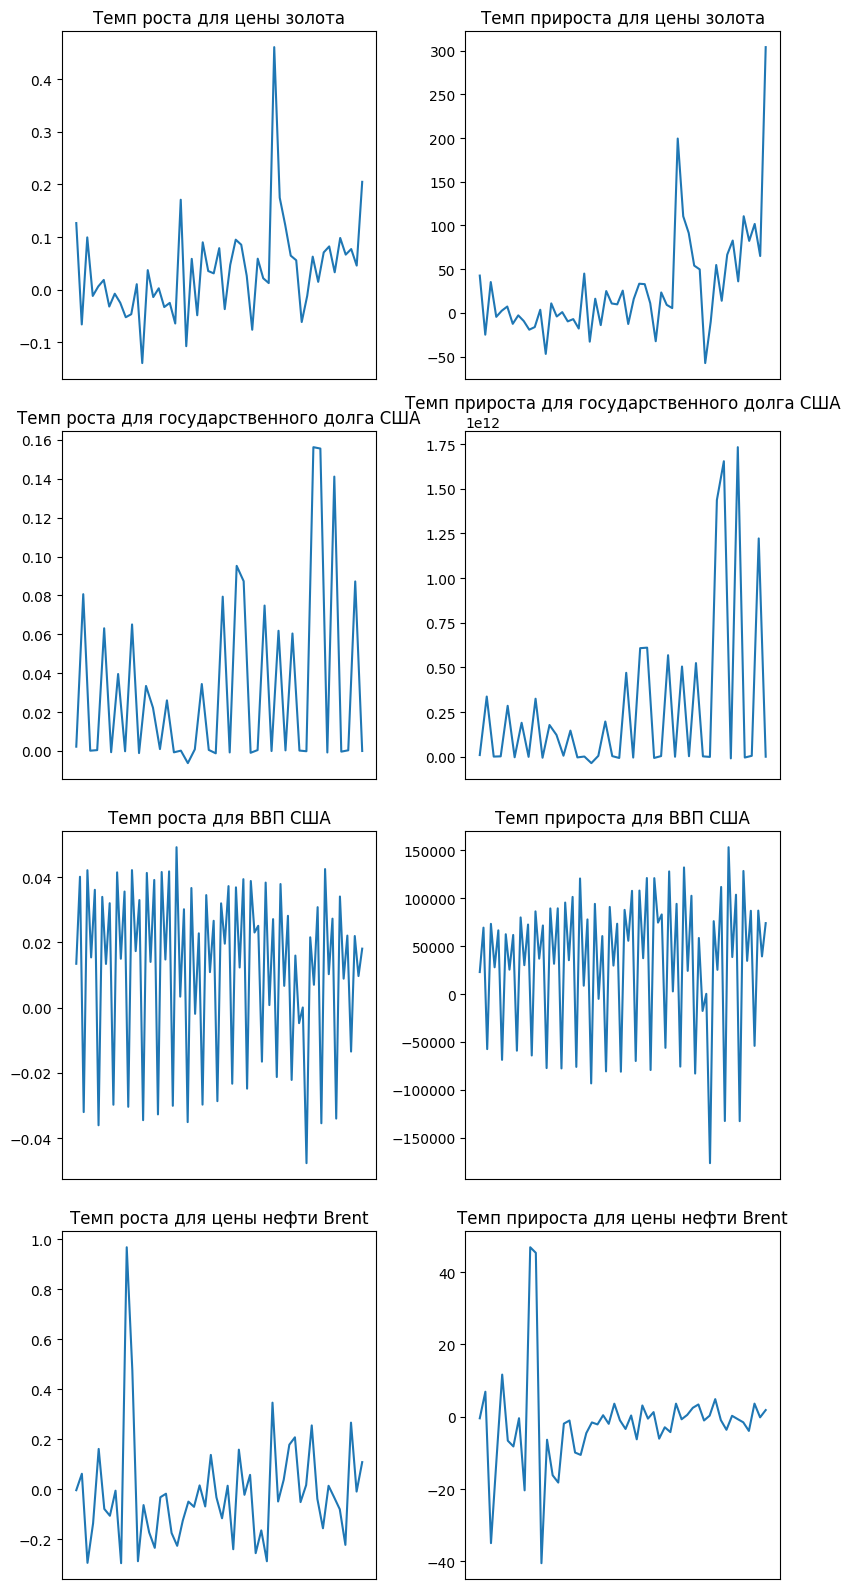

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(8, 16))

# Построение графиков темпа роста
axs[0, 0].plot(gold_prices_df['lag'], gold_prices_df['Growth_Rate'])
axs[0, 0].set_title('Темп роста для цены золота')
axs[0, 0].set_xticks([])

axs[1, 0].plot(debt_df['lag'], debt_df['Growth_Rate'])
axs[1, 0].set_title('Темп роста для государственного долга США')
axs[1, 0].set_xticks([])

axs[2, 0].plot(gdp_df['lag'], gdp_df['Growth_Rate'])
axs[2, 0].set_title('Темп роста для ВВП США')
axs[2, 0].set_xticks([])

axs[3, 0].plot(brent_df['lag'], brent_df['Growth_Rate'])
axs[3, 0].set_title('Темп роста для цены нефти Brent')
axs[3, 0].set_xticks([])

# Построение графиков темпа прироста
axs[0, 1].plot(gold_prices_df['lag'], gold_prices_df['Growth_Amount'])
axs[0, 1].set_title('Темп прироста для цены золота')
axs[0, 1].set_xticks([])

axs[1, 1].plot(debt_df['lag'], debt_df['Growth_Amount'])
axs[1, 1].set_title('Темп прироста для государственного долга США')
axs[1, 1].set_xticks([])

axs[2, 1].plot(gdp_df['lag'], gdp_df['Growth_Amount'])
axs[2, 1].set_title('Темп прироста для ВВП США')
axs[2, 1].set_xticks([])

axs[3, 1].plot(brent_df['lag'], brent_df['Growth_Amount'])
axs[3, 1].set_title('Темп прироста для цены нефти Brent')
axs[3, 1].set_xticks([])

plt.tight_layout()
plt.show()


In [19]:
print(f"Средний темп роста для цены золота: {gold_prices_df['Growth_Rate'].mean()}")
print(f"Средний темп роста для государственного дола США: {debt_df['Growth_Rate'].mean()}")
print(f"Средний темп роста для ВВП США: {gdp_df['Growth_Rate'].mean()}")
print(f"Средний темп роста для цены нефти Brent: {brent_df['Growth_Rate'].mean()}\n")

print(f"Дисперсия для цены золота: {gold_prices_df['Price_gold'].var()}")
print(f"Дисперсия для государственного дола США: {debt_df['Debt'].var()}")
print(f"Дисперсия для ВВП США: {gdp_df['Gdp'].var()}")
print(f"Дисперсия для цены нефти Brent: {brent_df['Price_brent'].var()}")

Средний темп роста для цены золота: 0.03571368990503463
Средний темп роста для государственного дола США: 0.032325863235380184
Средний темп роста для ВВП США: 0.011875961777781243
Средний темп роста для цены нефти Brent: -0.013875779764533554

Дисперсия для цены золота: 141969.43094339623
Дисперсия для государственного дола США: 1.0404999474401825e+25
Дисперсия для ВВП США: 548010583763.21423
Дисперсия для цены нефти Brent: 1136.0181933236572


Text(0.5, 1.0, 'Автокорреляционная функция для цены золота')

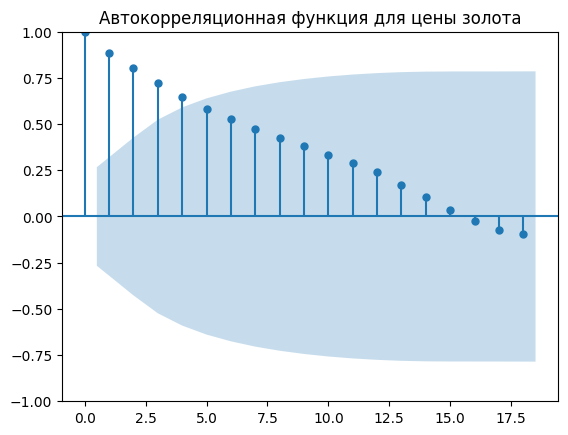

In [20]:
plot_acf(gold_prices_df['Price_gold'])
plt.title(f"Автокорреляционная функция для цены золота")

Text(0.5, 1.0, 'Частная автокорреляционная функция для цены золота')

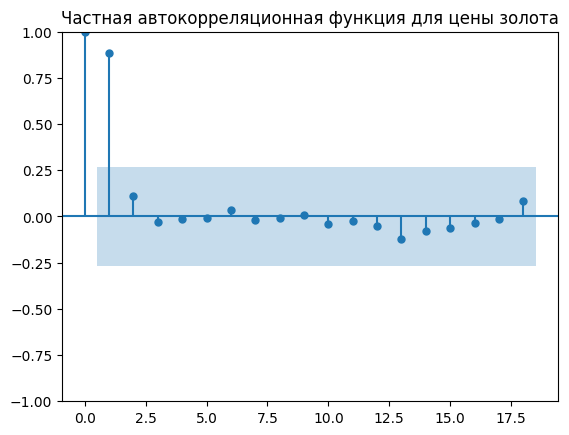

In [21]:
plot_pacf(gold_prices_df['Price_gold'])
plt.title(f"Частная автокорреляционная функция для цены золота")

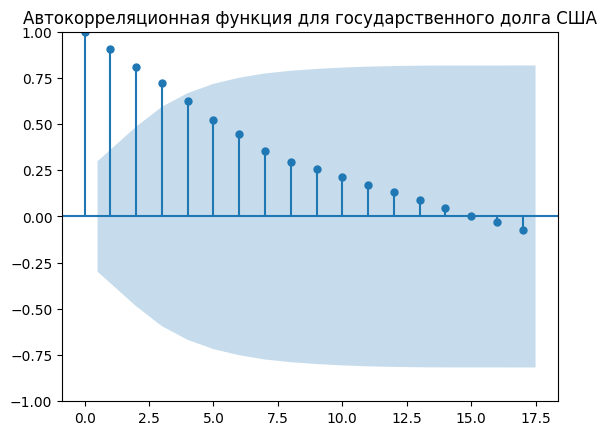

In [22]:
plot_acf(debt_df['Debt'])
plt.title(f"Автокорреляционная функция для государственного долга США")
plt.show()

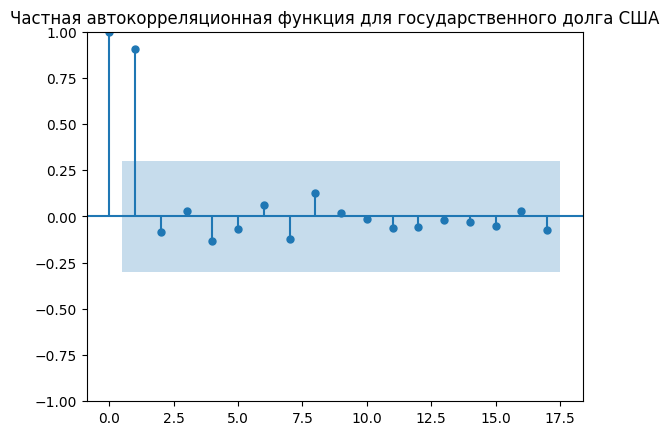

In [23]:
plot_pacf(debt_df['Debt'])
plt.title(f"Частная автокорреляционная функция для государственного долга США")
plt.show()

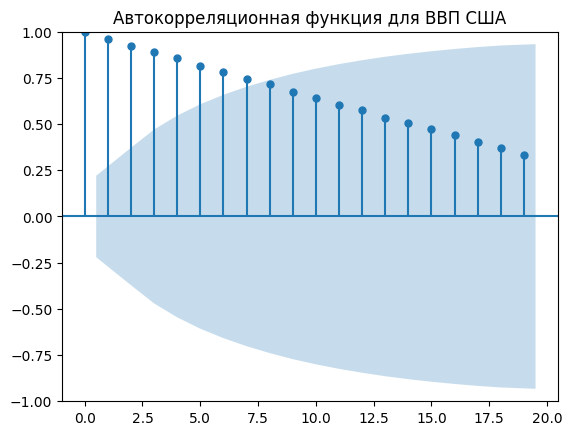

In [24]:
plot_acf(gdp_df['Gdp'])
plt.title(f"Автокорреляционная функция для ВВП США")
plt.show()

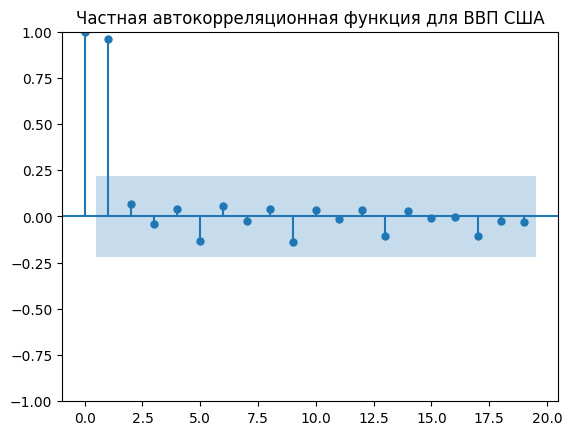

In [25]:
plot_pacf(gdp_df['Gdp'])
plt.title(f"Частная автокорреляционная функция для ВВП США")
plt.show()

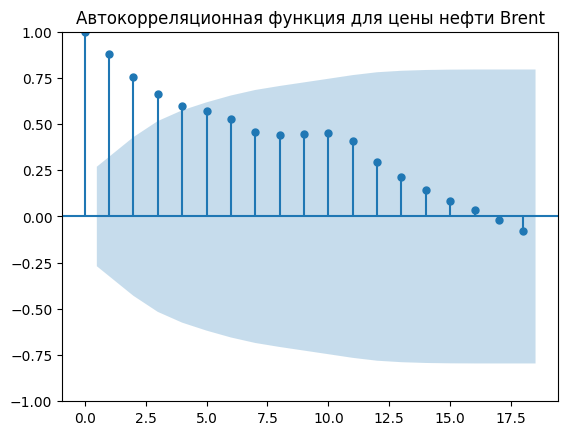

In [26]:
plot_acf(brent_df['Price_brent'])
plt.title(f"Автокорреляционная функция для цены нефти Brent")
plt.show()

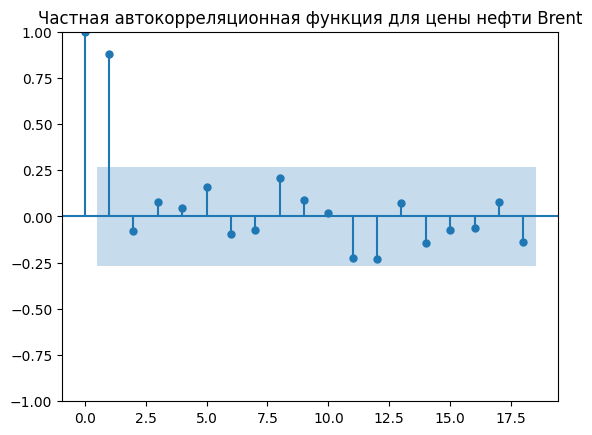

In [27]:
plot_pacf(brent_df['Price_brent'])
plt.title(f"Частная автокорреляционная функция для цены нефти Brent")
plt.show()

### Стационарность

In [28]:
from arch.unitroot import PhillipsPerron
from arch.unitroot import ADF
from arch.unitroot import KPSS

In [29]:
#тесты единичного корня
def unit_root_tests(data):
    results = {}
    print("Проведение ADF теста без тренда:")
    adf_test = ADF(data, trend='n')
    print(f'ADF Statistic: {adf_test.stat}')
    print(f'p-value: {adf_test.pvalue}')
    results['ADF'] = [adf_test.null_hypothesis, adf_test.stat, adf_test.pvalue]

    print("\nПроведение ADF теста с трендом:")
    adf_test = ADF(data, trend='ct')
    print(f'ADF Statistic: {adf_test.stat}')
    print(f'p-value: {adf_test.pvalue}')
    results['trend_ADF'] = [adf_test.null_hypothesis, adf_test.stat, adf_test.pvalue]
    
    print("\nПроведение PP теста без тренда:")
    pp_test = PhillipsPerron(data, trend='n')
    print(f'PP Statistic: {pp_test.stat}')
    print(f'p-value: {pp_test.pvalue}')
    results['PP'] = [pp_test.null_hypothesis, pp_test.stat, pp_test.pvalue]

    print("\nПроведение PP теста с трендом:")
    pp_test = PhillipsPerron(data, trend='ct')
    print(f'PP Statistic: {pp_test.stat}')
    print(f'p-value: {pp_test.pvalue}')
    results['trend_PP'] = [pp_test.null_hypothesis, pp_test.stat, pp_test.pvalue]
    
    print("\nПроведение KPSS теста без тренда:")
    kpss_test = KPSS(data, trend='c')
    print(f'KPSS Statistic: {kpss_test.stat}')
    print(f'p-value: {kpss_test.pvalue}')
    results['KPSS'] = [kpss_test.null_hypothesis, kpss_test.stat, kpss_test.pvalue]

    print("\nПроведение KPSS теста с трендом:")
    kpss_test = KPSS(data, trend='ct')
    print(f'KPSS Statistic: {kpss_test.stat}')
    print(f'p-value: {kpss_test.pvalue}')
    results['trend_KPSS'] = [kpss_test.null_hypothesis, kpss_test.stat, kpss_test.pvalue]

    return results

Тест единичного корня для цены золота и её первой разности:

In [78]:
res_gold_prices = unit_root_tests(gold_prices_df['Price_gold'])

Проведение ADF теста без тренда:
ADF Statistic: 5.956284409306517
p-value: 1.0

Проведение ADF теста с трендом:
ADF Statistic: 2.441069477313641
p-value: 1.0

Проведение PP теста без тренда:
PP Statistic: 4.530716243497056
p-value: 0.9999999998971696

Проведение PP теста с трендом:
PP Statistic: 3.39485841736704
p-value: 1.0

Проведение KPSS теста без тренда:
KPSS Statistic: 0.8940788922278222
p-value: 0.004366611984574393

Проведение KPSS теста с трендом:
KPSS Statistic: 0.2949580292312483
p-value: 0.0018571150711207424


In [119]:
res_gold_prices_delta = unit_root_tests(gold_prices_df['Growth_Amount'][1:])

Проведение ADF теста без тренда:
ADF Statistic: 1.384103794655801
p-value: 0.958025650828221

Проведение ADF теста с трендом:
ADF Statistic: -4.4199261377815455
p-value: 0.0020347934075096497

Проведение PP теста без тренда:
PP Statistic: -3.0024488105429223
p-value: 0.0026428229289549745

Проведение PP теста с трендом:
PP Statistic: -3.890233098127795
p-value: 0.012513149336913857

Проведение KPSS теста без тренда:
KPSS Statistic: 0.8499578625133524
p-value: 0.0055558223480802315

Проведение KPSS теста с трендом:
KPSS Statistic: 0.1269541906142309
p-value: 0.08289161877153818


Тест единичного корня для государственного долга США и его первой разности:

In [79]:
res_debt = unit_root_tests(debt_df['Debt'])

Проведение ADF теста без тренда:
ADF Statistic: 1.4315151049128585
p-value: 0.9618488532077463

Проведение ADF теста с трендом:
ADF Statistic: 2.071563362459677
p-value: 1.0

Проведение PP теста без тренда:
PP Statistic: 5.439226819847427
p-value: 1.0

Проведение PP теста с трендом:
PP Statistic: 0.22441457934793013
p-value: 0.9959113948398581

Проведение KPSS теста без тренда:
KPSS Statistic: 0.8495572304528184
p-value: 0.005567962713550958

Проведение KPSS теста с трендом:
KPSS Statistic: 0.22386095749744042
p-value: 0.008686611792935771


In [120]:
res_debt_delta = unit_root_tests(debt_df['Growth_Amount'][1:])

Проведение ADF теста без тренда:
ADF Statistic: 1.4919521784015186
p-value: 0.9663409678320682

Проведение ADF теста с трендом:
ADF Statistic: -1.4105374664798043
p-value: 0.8577925215488069

Проведение PP теста без тренда:
PP Statistic: -6.030552654549476
p-value: 8.096568301090743e-09

Проведение PP теста с трендом:
PP Statistic: -7.858310192987096
p-value: 1.5190621174182874e-10

Проведение KPSS теста без тренда:
KPSS Statistic: 0.7023756125611538
p-value: 0.012791739464008718

Проведение KPSS теста с трендом:
KPSS Statistic: 0.08773206707026764
p-value: 0.220542497837852


Тест единиченого корня ВВП США и его первой разности:

In [121]:
res_gdp = unit_root_tests(gdp_df['Gdp'])

Проведение ADF теста без тренда:
ADF Statistic: 2.301519831610537
p-value: 0.9961541128502045

Проведение ADF теста с трендом:
ADF Statistic: -2.1475706817043605
p-value: 0.5193768436111145

Проведение PP теста без тренда:
PP Statistic: 5.764621150270399
p-value: 1.0

Проведение PP теста с трендом:
PP Statistic: -4.921103757401341
p-value: 0.0002857308856899716

Проведение KPSS теста без тренда:
KPSS Statistic: 1.419432820825629
p-value: 0.00026280260760786693

Проведение KPSS теста с трендом:
KPSS Statistic: 0.10150908129249794
p-value: 0.15581478757547948


In [126]:
res_gdp_delta = unit_root_tests(gdp_df['Growth_Amount'][1:])

Проведение ADF теста без тренда:
ADF Statistic: -0.8080800667537319
p-value: 0.36712918613881995

Проведение ADF теста с трендом:
ADF Statistic: -3.426839854896752
p-value: 0.047903874925437996

Проведение PP теста без тренда:
PP Statistic: -12.543216273651526
p-value: 6.93388082023293e-23

Проведение PP теста с трендом:
PP Statistic: -17.406231936055786
p-value: 0.0

Проведение KPSS теста без тренда:
KPSS Statistic: 0.10110414064110164
p-value: 0.5801724007639344

Проведение KPSS теста с трендом:
KPSS Statistic: 0.08887866721605943
p-value: 0.2143999970568245


Тест единичного корня для цены нефти Brent и её первой разности:

In [81]:
res_brent = unit_root_tests(brent_df['Price_brent'])

Проведение ADF теста без тренда:
ADF Statistic: -1.9348396513965067
p-value: 0.050617840670771116

Проведение ADF теста с трендом:
ADF Statistic: -0.601752534153749
p-value: 0.9788618741160494

Проведение PP теста без тренда:
PP Statistic: -2.550499026730856
p-value: 0.010410360176121665

Проведение PP теста с трендом:
PP Statistic: -2.471565047656048
p-value: 0.34232144385770225

Проведение KPSS теста без тренда:
KPSS Statistic: 0.9665303991155452
p-value: 0.0029370119957983333

Проведение KPSS теста с трендом:
KPSS Statistic: 0.2011862096949034
p-value: 0.014556924666228105


In [127]:
res_brent_delta = unit_root_tests(brent_df['Growth_Amount'][1:])

Проведение ADF теста без тренда:
ADF Statistic: -3.3036980740983606
p-value: 0.0009668114625309843

Проведение ADF теста с трендом:
ADF Statistic: -3.375481289346811
p-value: 0.05475101310685212

Проведение PP теста без тренда:
PP Statistic: -7.296458534933696
p-value: 1.3043203554237354e-11

Проведение PP теста с трендом:
PP Statistic: -8.950037958207979
p-value: 4.708506340199673e-13

Проведение KPSS теста без тренда:
KPSS Statistic: 0.22223816248453976
p-value: 0.2285634684320773

Проведение KPSS теста с трендом:
KPSS Statistic: 0.09812436394742248
p-value: 0.16980877608869624


In [135]:
unit_root_reses = {'Цена золота' : res_gold_prices, '1 разность Цены золота': res_gold_prices_delta,
                   'Государственный долг США': res_debt, '1 разность Государственного долга США': res_debt_delta,
                   'ВВП США': res_gdp, '1 парзность ВВП США': res_gdp_delta,
                   'Цена нефти Brent': res_brent, '1 разность Цены нефти Brent': res_brent_delta}

In [136]:
results_table_y = pd.DataFrame(columns = ['ВР', 'Тест', 'Нулевая гипотеза (H0)', 'Статистика критерия', 'p-value', 'Вывод'])
for key in unit_root_reses.keys():
    for test in unit_root_reses[key]:
        if test in ['ADF','trend_ADF', 'PP', 'trend_PP']:
            if unit_root_reses[key][test][2] >= 0.05:
                sumup = "Отклоняем H0;  ВР не является стационарным"
            else:
                sumup = 'Принимаем H0;  ВР стационарен'
        else:
            if unit_root_reses[key][test][2] >= 0.05:
                sumup = 'Отклоняем H0;  ВР стационарен'
            else:
                sumup = 'Принимаем H0;  ВР не является стационарным'
        
        new_row = { 'ВР' : key, 'Тест' : test, 'Нулевая гипотеза (H0)' : unit_root_reses[key][test][0],
                    'Статистика критерия': unit_root_reses[key][test][1], 'p-value': unit_root_reses[key][test][2],
                    'Вывод': sumup}

        
        results_table_y = results_table_y._append(new_row, ignore_index = True)

C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_29392\523523056.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table_y = results_table_y._append(new_row, ignore_index = True)


In [137]:
results_table_y

ВР        Тест  \
0                             Цена золота         ADF   
1                             Цена золота   trend_ADF   
2                             Цена золота          PP   
3                             Цена золота    trend_PP   
4                             Цена золота        KPSS   
5                             Цена золота  trend_KPSS   
6                  1 разность Цены золота         ADF   
7                  1 разность Цены золота   trend_ADF   
8                  1 разность Цены золота          PP   
9                  1 разность Цены золота    trend_PP   
10                 1 разность Цены золота        KPSS   
11                 1 разность Цены золота  trend_KPSS   
12               Государственный долг США         ADF   
13               Государственный долг США   trend_ADF   
14               Государственный долг США          PP   
15               Государственный долг США    trend_PP   
16               Государственный долг США        KPSS   
17               Государственный долг США  trend_KPSS   
18  1 разность Государственного долга США         ADF   
19  1 разность Государственного долга США   trend_ADF   
20  1 разность Государственного долга США          PP   
21  1 разность Государственного долга США    trend_PP   
22  1 разность Государственного долга США        KPSS   
23  1 разность Государственного долга США  trend_KPSS   
24                                ВВП США         ADF   
25                                ВВП США   trend_ADF   
26                                ВВП США          PP   
27                                ВВП США    trend_PP   
28                                ВВП США        KPSS   
29                                ВВП США  trend_KPSS   
30                    1 парзность ВВП США         ADF   
31                    1 парзность ВВП США   trend_ADF   
32                    1 парзность ВВП США          PP   
33                    1 парзность ВВП США    trend_PP   
34                    1 парзность ВВП США        KPSS   
35                    1 парзность ВВП США  trend_KPSS   
36                       Цена нефти Brent         ADF   
37                       Цена нефти Brent   trend_ADF   
38                       Цена нефти Brent          PP   
39                       Цена нефти Brent    trend_PP   
40                       Цена нефти Brent        KPSS   
41                       Цена нефти Brent  trend_KPSS   
42            1 разность Цены нефти Brent         ADF   
43            1 разность Цены нефти Brent   trend_ADF   
44            1 разность Цены нефти Brent          PP   
45            1 разность Цены нефти Brent    trend_PP   
46            1 разность Цены нефти Brent        KPSS   
47            1 разность Цены нефти Brent  trend_KPSS   

                Нулевая гипотеза (H0)  Статистика критерия       p-value  \
0   The process contains a unit root.             5.956284  1.000000e+00   
1   The process contains a unit root.             2.441069  1.000000e+00   
2   The process contains a unit root.             4.530716  1.000000e+00   
3   The process contains a unit root.             3.394858  1.000000e+00   
4   The process is weakly stationary.             0.894079  4.366612e-03   
5   The process is weakly stationary.             0.294958  1.857115e-03   
6   The process contains a unit root.             1.384104  9.580257e-01   
7   The process contains a unit root.            -4.419926  2.034793e-03   
8   The process contains a unit root.            -3.002449  2.642823e-03   
9   The process contains a unit root.            -3.890233  1.251315e-02   
10  The process is weakly stationary.             0.849958  5.555822e-03   
11  The process is weakly stationary.             0.126954  8.289162e-02   
12  The process contains a unit root.             1.431515  9.618489e-01   
13  The process contains a unit root.             2.071563  1.000000e+00   
14  The process contains a unit root.             5.439227  1.000000e+00   
15  The process contains a un

In [139]:
#Импортируем таблицу с результатами в csv для вставки в отчет
results_table_y.to_csv('results_table_y.csv', index=False, encoding='windows-1251')

### Наличие взаимосвязей

In [46]:
df = gold_prices_df[['Date', 'Price_gold']].merge(debt_df[['Date', 'Debt']], on='Date').merge(gdp_df[['Date', 'Gdp']], on='Date').merge(brent_df[['Date', 'Price_brent']], on='Date')
df_copy = df.copy()

In [47]:
statistics = ['Price_gold', 'Debt', 'Gdp', 'Price_brent']

In [48]:
for statistic in statistics:
    df[f'{statistic}_dif'] = df[f'{statistic}']-df[f'{statistic}'].shift(1)
    df[f'{statistic}_dif2'] = df[f'{statistic}_dif']-df[f'{statistic}_dif'].shift(1)
    df[f'{statistic}_dif3'] = df[f'{statistic}_dif2']-df[f'{statistic}_dif2'].shift(1)
df2 = df.dropna()

In [49]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels. tsa.stattools import grangercausalitytests

In [150]:
adf_table_n = pd.DataFrame(index=statistics, columns=['pvalue','dif_pvalue', 'dif2_pvalue', 'dif3_pvalue','Integration_order'])

for statistic in statistics:
    adf_table_n.loc[statistic,'pvalue'] = ADF(df2[f'{statistic}'], trend='n').pvalue
    adf_table_n.loc[statistic,'dif_pvalue'] = ADF(df2[f'{statistic}_dif'], trend='n').pvalue
    adf_table_n.loc[statistic,'dif2_pvalue'] = ADF(df2[f'{statistic}_dif2'], trend='n').pvalue
    adf_table_n.loc[statistic,'dif3_pvalue'] = ADF(df2[f'{statistic}_dif3'], trend='n').pvalue

#     adf_table_n.loc[statistic,'pvalue'] = adfuller(df2[f'{statistic}'],regression='n')[1]
#     adf_table_n.loc[statistic,'dif_pvalue'] = adfuller(df2[f'{statistic}_dif'],regression='n')[1]
#     adf_table_n.loc[statistic,'dif2_pvalue'] = adfuller(df2[f'{statistic}_dif2'],regression='n')[1]
#     adf_table_n.loc[statistic,'dif3_pvalue'] = adfuller(df2[f'{statistic}_dif3'],regression='n')[1]
    
for statistic in statistics:
    if adf_table_n.loc[statistic,'pvalue'] < 0.05:
        adf_table_n.loc[statistic,'Integration_order'] = 0
    elif adf_table_n.loc[statistic,'dif_pvalue'] < 0.05:
        adf_table_n.loc[statistic,'Integration_order'] = 1
    elif adf_table_n.loc[statistic,'dif2_pvalue'] < 0.05:
        adf_table_n.loc[statistic,'Integration_order'] = 2
    elif np.isnan(adf_table_n.loc[statistic,'dif3_pvalue']) or adf_table_n.loc[statistic,'dif3_pvalue'] < 0.05:
        adf_table_n.loc[statistic,'Integration_order'] = 3
        
adf_table_c = pd.DataFrame(index=statistics, columns=['pvalue','dif_pvalue', 'dif2_pvalue', 'dif3_pvalue', 'Integration_order'])

for statistic in statistics:
    adf_table_c.loc[statistic,'pvalue'] = ADF(df2[f'{statistic}'], trend='c').pvalue
    adf_table_c.loc[statistic,'dif_pvalue'] = ADF(df2[f'{statistic}_dif'], trend='n').pvalue
    adf_table_c.loc[statistic,'dif2_pvalue'] = ADF(df2[f'{statistic}_dif2'], trend='n').pvalue
    adf_table_c.loc[statistic,'dif3_pvalue'] = ADF(df2[f'{statistic}_dif3'], trend='n').pvalue
    
#     adf_table_c.loc[statistic,'pvalue'] = adfuller(df2[f'{statistic}'],regression='c')[1]
#     adf_table_c.loc[statistic,'dif_pvalue'] = adfuller(df2[f'{statistic}_dif'],regression='n')[1]
#     adf_table_c.loc[statistic,'dif2_pvalue'] = adfuller(df2[f'{statistic}_dif2'],regression='n')[1]
#     adf_table_n.loc[statistic,'dif3_pvalue'] = adfuller(df2[f'{statistic}_dif3'],regression='n')[1]
    
for statistic in statistics:
    if adf_table_c.loc[statistic,'pvalue'] < 0.05:
        adf_table_c.loc[statistic,'Integration_order'] = 0
    elif adf_table_c.loc[statistic,'dif_pvalue'] < 0.05:
        adf_table_c.loc[statistic,'Integration_order'] = 1
    elif adf_table_c.loc[statistic,'dif2_pvalue'] < 0.05:
        adf_table_c.loc[statistic,'Integration_order'] = 2
    elif np.isnan(adf_table_c.loc[statistic,'dif3_pvalue']) or adf_table_c.loc[statistic,'dif3_pvalue'] < 0.05:
        adf_table_c.loc[statistic,'Integration_order'] = 3
        
adf_table_ct = pd.DataFrame(index=statistics, columns=['pvalue','dif_pvalue', 'dif2_pvalue', 'dif3_pvalue', 'Integration_order'])

for statistic in statistics:
    adf_table_ct.loc[statistic,'pvalue'] = ADF(df2[f'{statistic}'], trend='ct', max_lags=7).pvalue
    adf_table_ct.loc[statistic,'dif_pvalue'] = ADF(df2[f'{statistic}_dif'], trend='n').pvalue
    adf_table_ct.loc[statistic,'dif2_pvalue'] = ADF(df2[f'{statistic}_dif2'], trend='n').pvalue
    adf_table_ct.loc[statistic,'dif3_pvalue'] = ADF(df2[f'{statistic}_dif3'], trend='n').pvalue
    
#     adf_table_ct.loc[statistic,'pvalue'] = adfuller(df2[f'{statistic}'],regression='ct')[1]
#     adf_table_ct.loc[statistic,'dif_pvalue'] = adfuller(df2[f'{statistic}_dif'],regression='n')[1]
#     adf_table_ct.loc[statistic,'dif2_pvalue'] = adfuller(df2[f'{statistic}_dif2'],regression='n')[1]
#     adf_table_n.loc[statistic,'dif3_pvalue'] = adfuller(df2[f'{statistic}_dif3'],regression='n')[1]
    
for statistic in statistics:
    if adf_table_ct.loc[statistic,'pvalue'] < 0.05:
        adf_table_ct.loc[statistic,'Integration_order'] = 0
    elif adf_table_ct.loc[statistic,'dif_pvalue'] < 0.05:
        adf_table_ct.loc[statistic,'Integration_order'] = 1
    elif adf_table_ct.loc[statistic,'dif2_pvalue'] < 0.05:
        adf_table_ct.loc[statistic,'Integration_order'] = 2
    elif np.isnan(adf_table_ct.loc[statistic,'dif3_pvalue']) or adf_table_ct.loc[statistic,'dif3_pvalue'] < 0.05:
        adf_table_ct.loc[statistic,'Integration_order'] = 3

print('p-value ADF-теста без константы и тренда')        
print(adf_table_n)
print('\np-value ADF-теста с константой')
print(adf_table_c)
print('\np-value ADF-теста с константой и трендом')
print(adf_table_ct)

p-value ADF-теста без константы и тренда
               pvalue dif_pvalue dif2_pvalue dif3_pvalue Integration_order
Price_gold        1.0   0.517574    0.393206    0.000309                 3
Debt              1.0   0.992105    0.721328    0.000624                 3
Gdp          0.204243   0.410426    0.118582    0.001073                 3
Price_brent  0.780101        0.0    0.000001     0.00161                 1

p-value ADF-теста с константой
               pvalue dif_pvalue dif2_pvalue dif3_pvalue Integration_order
Price_gold   0.468597   0.517574    0.393206    0.000309                 3
Debt          0.99876   0.992105    0.721328    0.000624                 3
Gdp          0.688912   0.410426    0.118582    0.001073                 3
Price_brent  0.803561        0.0    0.000001     0.00161                 1

p-value ADF-теста с константой и трендом
               pvalue dif_pvalue dif2_pvalue dif3_pvalue Integration_order
Price_gold   0.996456   0.517574    0.393206    0.000309    

Без константы и тренда все ряды стационарны на 3 лаге.

**Построим коинтеграционную матрицу**

In [151]:
from statsmodels.tsa.stattools import coint

In [177]:
gold_prices_df1 = gold_prices_df.copy()
debt_df1 = debt_df.copy()
gdp_df1 = gdp_df.copy()
brent_df1 = brent_df.copy()
gold_prices_df1.set_index('Date', inplace=True)
debt_df1.set_index('Date', inplace=True)
gdp_df1.set_index('Date', inplace=True)
brent_df1.set_index('Date', inplace=True)


df_coint = gold_prices_df1[['Price_gold']].join(debt_df1[['Debt']], how='outer')
df_coint = df_coint.join(gdp_df1[['Gdp']], how='outer')
df_coint = df_coint.join(brent_df1[['Price_brent']], how='outer')

series = ['Price_gold', 'Debt', 'Gdp', 'Price_brent']

#матрица коинтеграции
coint_matrix = pd.DataFrame(np.zeros((len(series), len(series))), index=series, columns=series)


for i in range(len(series)):
    for j in range(i+1, len(series)):
        
        s1 = df_coint[series[i]].dropna()
        s2 = df_coint[series[j]].dropna()
        common_index = s1.index.intersection(s2.index)
        result = coint(s1.loc[common_index], s2.loc[common_index])
        coint_matrix.loc[series[i], series[j]] = result[1]
        coint_matrix.loc[series[j], series[i]] = result[1]


coint_matrix

Price_gold      Debt       Gdp  Price_brent
Price_gold     0.000000  0.117866  0.978279     0.914209
Debt           0.117866  0.000000  0.540406     0.333892
Gdp            0.978279  0.540406  0.000000     0.077036
Price_brent    0.914209  0.333892  0.077036     0.000000

**Исследуем причинность по Гренджеру**

In [54]:
for statistic1 in statistics:
    for statistic2 in statistics:
        if statistic1 != statistic2:
            print(f'\nПричинность по Гренджеру, {statistic1} от {statistic2}')
            grangercausalitytests(df[[statistic1, statistic2]], maxlag=3);


Причинность по Гренджеру, Price_gold от Debt

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0952  , p=0.0534  , df_denom=26, df_num=1
ssr based chi2 test:   chi2=4.5677  , p=0.0326  , df=1
likelihood ratio test: chi2=4.2418  , p=0.0394  , df=1
parameter F test:         F=4.0952  , p=0.0534  , df_denom=26, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6695  , p=0.0414  , df_denom=23, df_num=2
ssr based chi2 test:   chi2=8.9345  , p=0.0115  , df=2
likelihood ratio test: chi2=7.7544  , p=0.0207  , df=2
parameter F test:         F=3.6695  , p=0.0414  , df_denom=23, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0403  , p=0.0528  , df_denom=20, df_num=3
ssr based chi2 test:   chi2=12.3133 , p=0.0064  , df=3
likelihood ratio test: chi2=10.1446 , p=0.0174  , df=3
parameter F test:         F=3.0403  , p=0.0528  , df_denom=20, df_num=3

Причинность по Гренджеру, Price_gold от Gdp

Granger 

![image](scheme1.png)

На данной схеме можем наблюдать зависимость переменных по Гренджеру, цифрой обозначен лаг.

Можно сделать вывод, что Gpd экзогенная (не зависит от других по Гренджеру) переменная, остальные переменные эндогенные.

In [55]:
model = VAR(df_copy[statistics])
to_model_compare = pd.DataFrame(index = [3, 4], columns=['AIC', 'HQ', 'SC', 'FPE'])
for i in range(3, 5):
    results = model.fit(i)
    to_model_compare.loc[i, 'AIC'] = results.aic
    to_model_compare.loc[i, 'HQ'] = results.hqic
    to_model_compare.loc[i, 'SC'] = results.bic
    to_model_compare.loc[i, 'FPE'] = results.fpe
to_model_compare

AIC         HQ         SC                                       FPE
3  86.895688  87.637786  89.391374  77483209257665687487919912879122284544.0
4  85.849241  86.796759  89.139647  53587212286657257673091294581068136448.0

По критериям лучше 4 лага

In [56]:
results = model.fit(4)

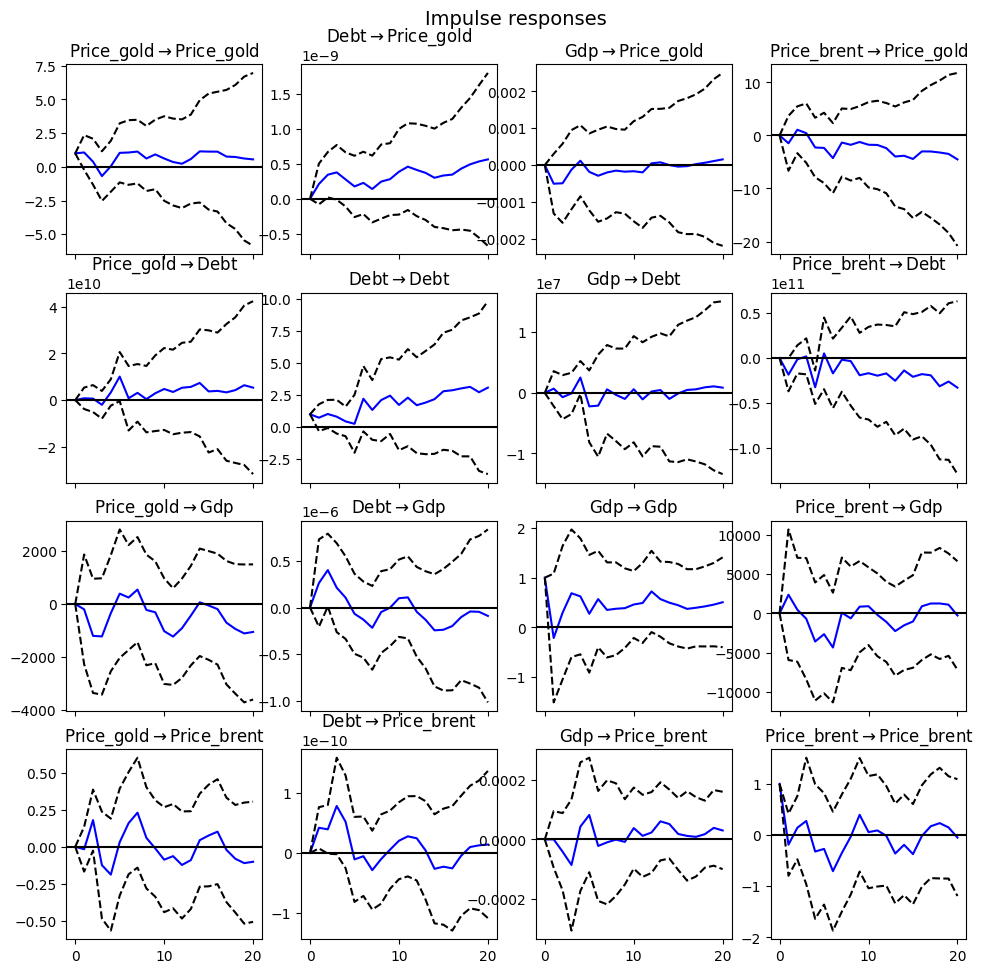

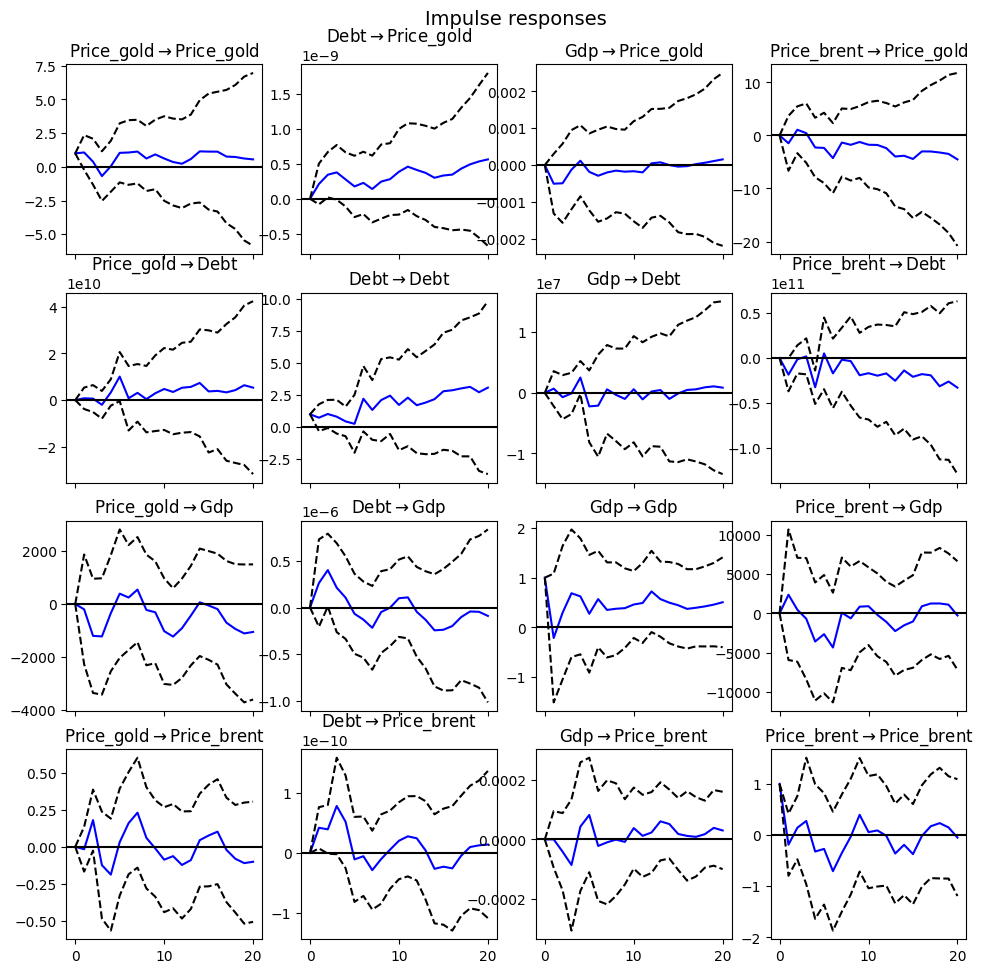

In [57]:
results.irf(20).plot()

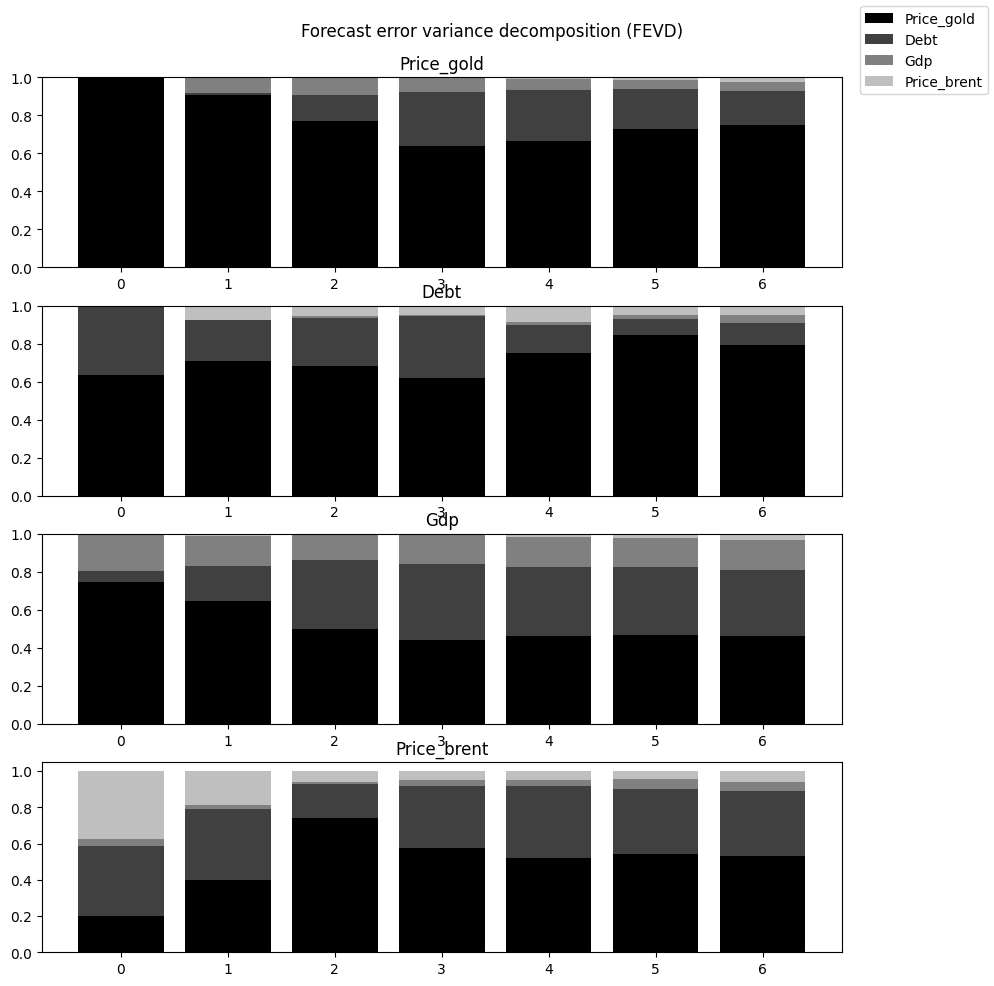

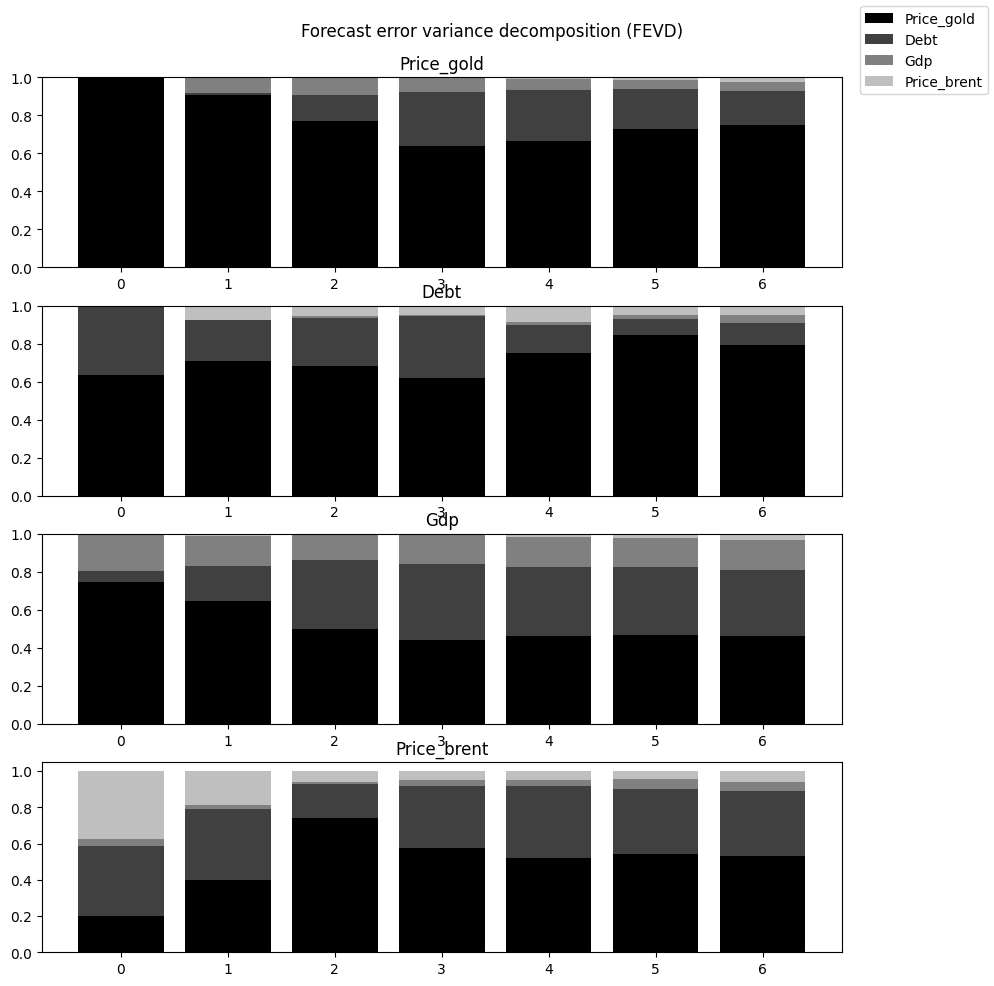

In [58]:
results.fevd(7).plot()

In [59]:
forecast = results.forecast(df_copy[statistics].values[-results.k_ar:], steps=3)
print(forecast)

[[2.00511231e+03 1.71269783e+13 4.10230410e+06 1.34376293e+02]
 [2.11603416e+03 1.70955330e+13 4.03119959e+06 1.43092673e+02]
 [2.24586065e+03 1.86353495e+13 4.03420716e+06 1.21128712e+02]]
